In [1]:
# https://www.kaggle.com/vanvalkenberg/automobilepriceprediction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


In [2]:
DataFrame = pd.read_csv('automobile_data.csv')
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
DataFrame.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [4]:
## lets clean the data 
## and convert objects
## to int 
DataFrame = DataFrame.replace(to_replace = '?', value = 0) 
DataFrame['price'] = DataFrame['price'].astype('int64')


In [5]:
## let define a mapper function
## this function will map objects 
## integer values
def mapper(param):
    uniqueVals = set(DataFrame[param]);
    mappedVals = {};
    i = 0
    
    for mem in uniqueVals:
        mappedVals[mem] = i
        i = i + 1
    
    print (mappedVals)
    DataFrame[param] =  DataFrame[param].map(mappedVals)
    
    return uniqueVals, mappedVals

In [6]:
## using above functions lets get done with mapping
uFuelsystem, mFuelsystem = mapper('fuel-system')

{'idi': 0, 'mfi': 1, 'spfi': 2, 'mpfi': 3, '1bbl': 4, '4bbl': 5, 'spdi': 6, '2bbl': 7}


In [7]:
## mapping engine-location
uEngineLocation, mEngineLocation = mapper('engine-location')

{'front': 0, 'rear': 1}


In [8]:
## mapping drive-wheels
uDriveWheel,  mWheelDrive = mapper('drive-wheels')

{'4wd': 0, 'rwd': 1, 'fwd': 2}


In [9]:
## mapping body-style, num-of-doors, aspiration, fuel-type, make
uBodyStyle, mBodyStyle = mapper('body-style')
uNumDoors, mNumDoors = mapper('num-of-doors')
uAspiration, mAspiration = mapper('aspiration')
uFuelSystem, mFuelSystem = mapper('fuel-type')
uMAke, mMake = mapper('make')

{'wagon': 0, 'convertible': 1, 'hardtop': 2, 'sedan': 3, 'hatchback': 4}
{0: 0, 'four': 1, 'two': 2}
{'std': 0, 'turbo': 1}
{'diesel': 0, 'gas': 1}
{'mazda': 0, 'nissan': 1, 'isuzu': 2, 'jaguar': 3, 'volvo': 4, 'dodge': 5, 'saab': 6, 'mercedes-benz': 7, 'bmw': 8, 'mercury': 9, 'mitsubishi': 10, 'toyota': 11, 'subaru': 12, 'peugot': 13, 'alfa-romero': 14, 'plymouth': 15, 'honda': 16, 'volkswagen': 17, 'renault': 18, 'porsche': 19, 'audi': 20, 'chevrolet': 21}


In [10]:
## also mapping these features 
uNumOfCylinders, mNumOfCylinders = mapper('num-of-cylinders')
uEngineType, MEngineType = mapper('engine-type')

{'four': 0, 'twelve': 1, 'two': 2, 'eight': 3, 'six': 4, 'five': 5, 'three': 6}
{'ohc': 0, 'dohc': 1, 'ohcf': 2, 'ohcv': 3, 'dohcv': 4, 'l': 5, 'rotor': 6}


In [11]:
## remaining work is to  typeCast objects to int 64
DataFrame['normalized-losses'] = DataFrame['normalized-losses'].astype('int64')
DataFrame['engine-type'] = DataFrame['engine-type'].astype('int64')
DataFrame['num-of-cylinders'] = DataFrame['num-of-cylinders'].astype('int64')
DataFrame['stroke'] = DataFrame['stroke'].astype('float64')
DataFrame['bore'] = DataFrame['bore'].astype('float')
DataFrame['horsepower'] = DataFrame['horsepower'].astype('int64')
DataFrame['peak-rpm'] = DataFrame['peak-rpm'].astype('int64')

DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [12]:
## saving this file so that it can be further used
DataFrame.to_csv('processed_car_data.csv')

In [13]:
## lets train some model using entire data ie not splitting data into training and testing 
FeatureVector = DataFrame [['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']]

Price = DataFrame['price']

FeatureVector = np.array(FeatureVector)
Price = np.array(Price)



In [14]:
samples, features = FeatureVector.shape
## lets use standard scaler to scale our feature vector
## also lets reduce price by a scale of 1000

In [15]:
import sklearn
from sklearn.preprocessing import StandardScaler
StdSc = StandardScaler()
FeatureVector = StdSc.fit_transform(FeatureVector)
Price = Price / 1000

In [16]:
## lets traing the simplest model ie linear regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(FeatureVector, Price)

LinearRegression()

In [17]:
LinerRegressionsPredictions = LR.predict(FeatureVector)
LinerRegressionsPredictions = LinerRegressionsPredictions.flatten()

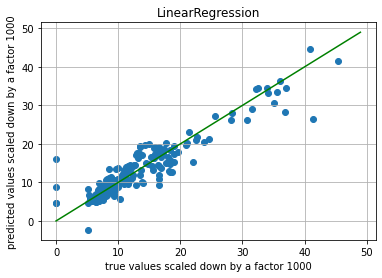

In [18]:
## lets see who did linear regression performed
import matplotlib.pyplot as plt
plt.scatter(Price, LinerRegressionsPredictions)
plt.xlabel('true values scaled down by a factor 1000')
plt.ylabel('predicted values scaled down by a factor 1000')
plt.title('LinearRegression')
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'green')
plt.grid(True)

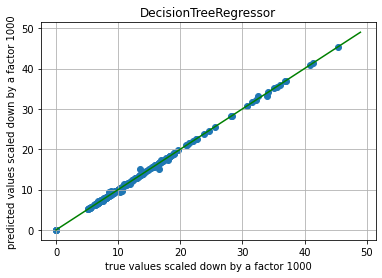

In [19]:
## lets move  a step further to decission Tree regressor
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(FeatureVector, Price)
DecissionTreeRegressorPrediction = (DTR.predict(FeatureVector))

plt.scatter(Price, DecissionTreeRegressorPrediction)
plt.xlabel('true values scaled down by a factor 1000')
plt.ylabel('predicted values scaled down by a factor 1000')
plt.title('DecisionTreeRegressor')
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'green')
plt.grid(True)

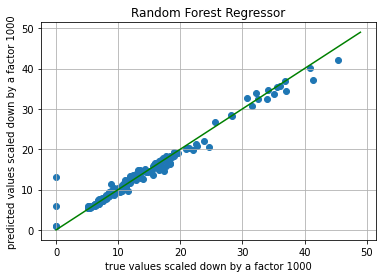

In [20]:
## let try a random forest regressor 
## lets hope to see some less overfitting
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(FeatureVector, Price)
RandomForestsPredictions = RFR.predict(FeatureVector)

plt.scatter(Price, RandomForestsPredictions)
plt.xlabel('true values scaled down by a factor 1000')
plt.ylabel('predicted values scaled down by a factor 1000')
plt.title('Random Forest Regressor')
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'green')
plt.grid(True)

## reduced overfitting

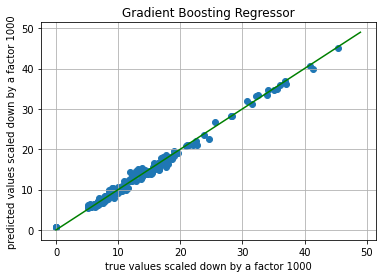

In [21]:
## lets try gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(FeatureVector, Price)
GradientBoostsPrediction = GBR.predict(FeatureVector)

plt.scatter(Price, GradientBoostsPrediction)
plt.xlabel('true values scaled down by a factor 1000')
plt.ylabel('predicted values scaled down by a factor 1000')
plt.title('Gradient Boosting Regressor')
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'green')
plt.grid(True)